<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Regressao_Linear_Multipla_com_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.formula.api as smf

In [2]:
credito = pd.read_excel('Limite_Credito_Dummy.xlsx')
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [4]:
le = LabelEncoder()
le.fit(credito.Escolaridade)
credito.Escolaridade = le.transform(credito.Escolaridade)
le.fit(credito.Gênero)
credito.Gênero = le.transform(credito.Gênero)
le.fit(credito.Região)
credito.Região = le.transform(credito.Região)
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

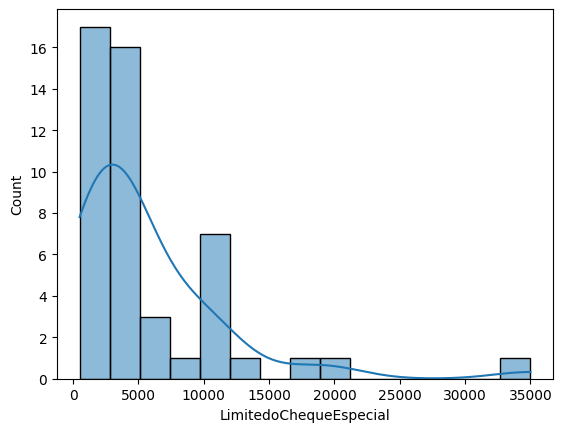

In [6]:
sns.histplot(credito, x='LimitedoChequeEspecial', kde=True)

<Axes: xlabel='Idade', ylabel='Count'>

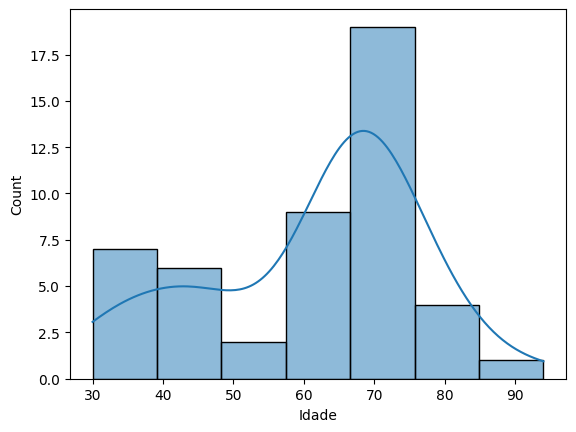

In [7]:
sns.histplot(credito, x='Idade', kde=True)

In [8]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [14]:
scaler = MinMaxScaler()
credito_scaled = pd.DataFrame(scaler.fit_transform(credito), columns=credito.columns, index=credito.index)
credito_scaled.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [15]:
credito_scaled.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
function = 'LimitedoChequeEspecial ~ Salario +	Gênero +	Região - 1'

In [33]:
model = smf.ols(formula=function, data=credito_scaled).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Fri, 10 Jan 2025   Prob (F-statistic):                    2.56e-25
Time:                            11:49:15   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [34]:
x = credito_scaled[['Salario', 'Gênero', 'Região']]
y = credito_scaled['LimitedoChequeEspecial']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred_train = LR.predict(x_train)
print('MAE: ' , metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE: ' , metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE:  0.03369009365701896
MSE:  0.002252899550747987
RMSE:  0.04746471901052388


In [43]:
y_pred_test = LR.predict(x_test)
print('MAE: ' , metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ' , metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE:  0.06987270468300606
MSE:  0.010091741419997361
RMSE:  0.10045765983735318
